<a href="https://colab.research.google.com/github/Vedant0402/EDA_reusable_code/blob/main/EDA(Day-6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 6 — Bivariate Analysis (Relationships Between Two Variables)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
print("Null Values: ", df.isnull().sum())

Null Values:  species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


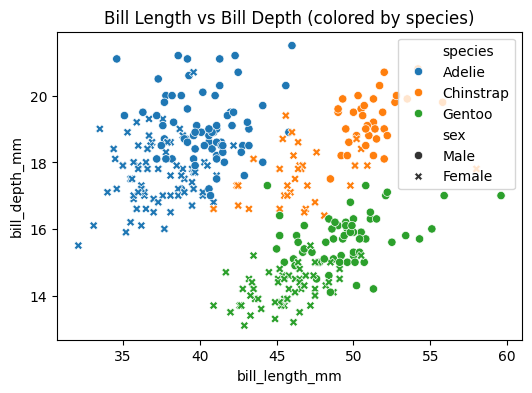

In [7]:
# Bivariate Analysis — Numerical vs Numerical
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species", style="sex")
plt.title("Bill Length vs Bill Depth (colored by species)")
plt.show()

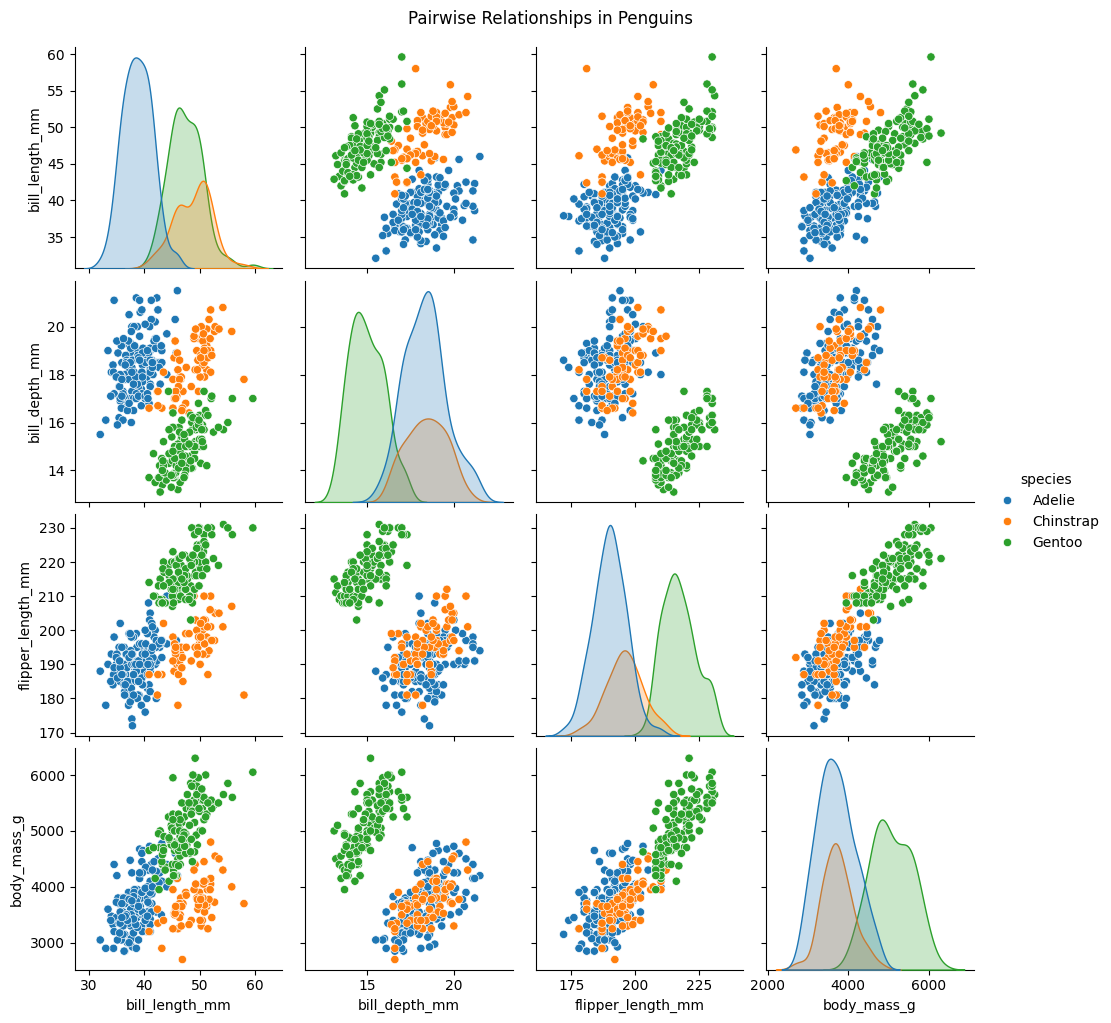

In [8]:
sns.pairplot(df, hue="species", diag_kind="kde")
plt.suptitle("Pairwise Relationships in Penguins", y=1.02)
plt.show()

#### Observation --> Each scatter shows how two numeric variables interact, colored by species.

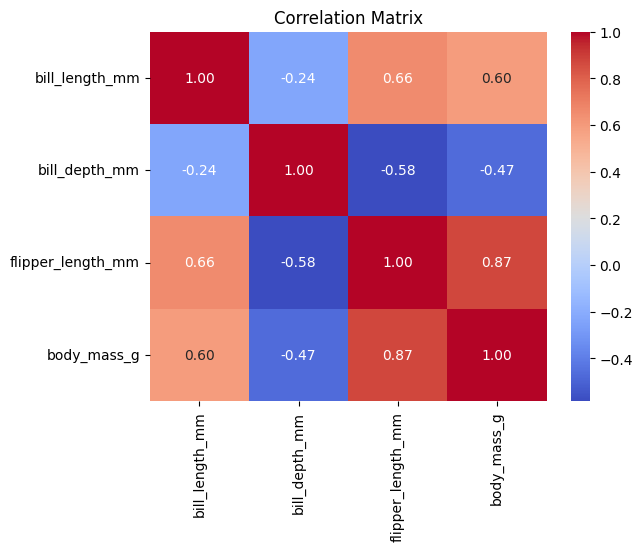

In [9]:
corr = df.select_dtypes('number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Observation -->
####Positive (red) -- both increase together

####Negative (blue) -- one increases, other decreases

/tmp/ipython-input-2877254055.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="species", y="body_mass_g", palette="Set2")


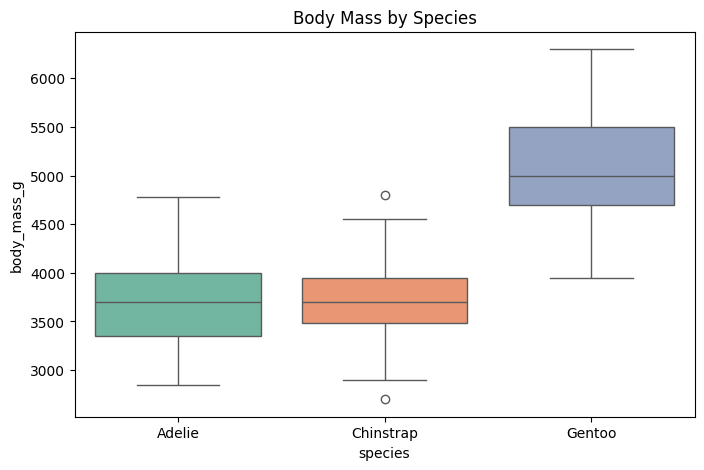

In [11]:
# Categorical vs Numerical
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="species", y="body_mass_g", palette="Set2")
plt.title("Body Mass by Species")
plt.show()

/tmp/ipython-input-2980678105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="species", y="flipper_length_mm", inner="quartile", palette="muted")


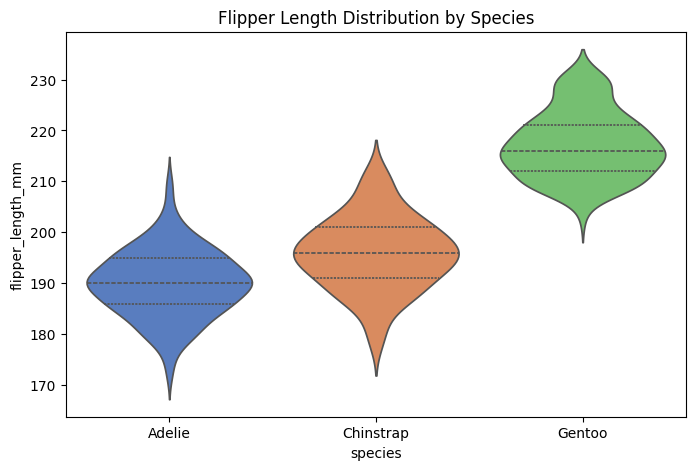

In [12]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="species", y="flipper_length_mm", inner="quartile", palette="muted")
plt.title("Flipper Length Distribution by Species")
plt.show()

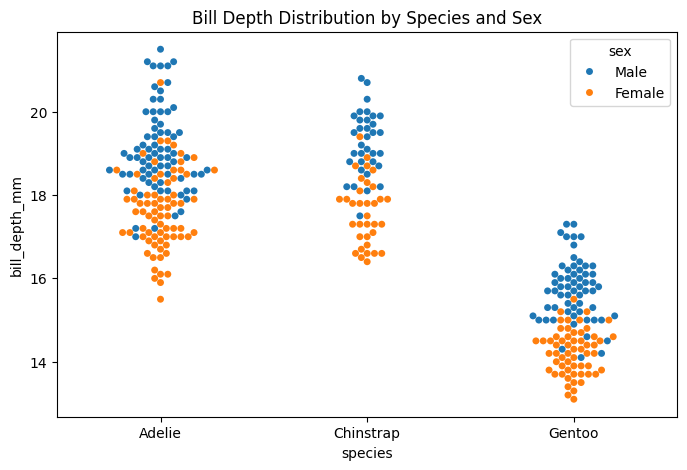

In [13]:
plt.figure(figsize=(8,5))
sns.swarmplot(data=df, x="species", y="bill_depth_mm", hue="sex")
plt.title("Bill Depth Distribution by Species and Sex")
plt.show()

In [14]:
# Categorical vs Categorical
pd.crosstab(df['species'], df['sex'], normalize='index') * 100


sex,Female,Male
species,,
Adelie,50.000000,50.000000
Chinstrap,50.000000,50.000000
Gentoo,48.739496,51.260504


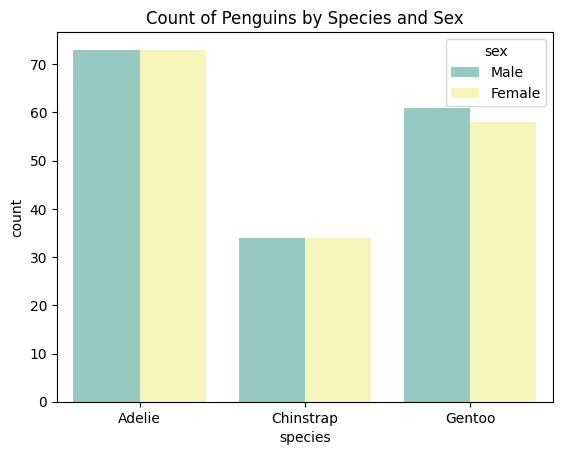

In [15]:
sns.countplot(data=df, x="species", hue="sex", palette="Set3")
plt.title("Count of Penguins by Species and Sex")
plt.show()


In [16]:
# Statistical Correlation
# Numerical–Numerical: Pearson Correlation

from scipy.stats import pearsonr
r, p = pearsonr(df['flipper_length_mm'].dropna(), df['body_mass_g'].dropna())
print(f"Pearson correlation: {r:.2f}, p-value: {p:.5f}")

Pearson correlation: 0.87, p-value: 0.00000


In [17]:
# Categorical–Categorical: Chi-Square Test

from scipy.stats import chi2_contingency
contingency = pd.crosstab(df['species'], df['sex'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square: {chi2:.2f}, p-value: {p:.5f}")


Chi-square: 0.05, p-value: 0.97599
